In [64]:
# import usual suspects
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy

In [65]:
# setup architectural parameters

learning_Rate = 0.01
training_Epochs = 1000
display_Step = 50


In [66]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
# get total rows of train_X
n_samples = train_X.shape[0]

In [67]:
#  tf Graph Input
X = tf.placeholder('float')
Y = tf.placeholder('float')


In [68]:
# Set model weights
W = tf.Variable(numpy.random.randn(), name= 'weight')
b = tf.Variable(numpy.random.randn(), name = 'bias')

In [69]:
# construct a Linear model y = XW + b
pred = tf.add(tf.multiply(X, W), b)

In [70]:
# mean squared error
cost = tf.reduce_sum(tf.pow(pred - Y,2)) / (2 * n_samples)

In [71]:
# Optimizer, we wil use Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_Rate).minimize(cost)

In [72]:
# Initialize the tf.Variables
init = tf.global_variables_initializer()


 Epoch:  50 Cost=  0.0847614 W=  0.200597 b=  1.15395

 Epoch:  100 Cost=  0.0838688 W=  0.203511 b=  1.13298

 Epoch:  150 Cost=  0.0830788 W=  0.206251 b=  1.11327

 Epoch:  200 Cost=  0.0823799 W=  0.208829 b=  1.09473

 Epoch:  250 Cost=  0.0817614 W=  0.211253 b=  1.07729

 Epoch:  300 Cost=  0.0812141 W=  0.213533 b=  1.06088

 Epoch:  350 Cost=  0.0807297 W=  0.215678 b=  1.04545

 Epoch:  400 Cost=  0.080301 W=  0.217695 b=  1.03094

 Epoch:  450 Cost=  0.0799216 W=  0.219592 b=  1.0173

 Epoch:  500 Cost=  0.0795858 W=  0.221376 b=  1.00446

 Epoch:  550 Cost=  0.0792887 W=  0.223055 b=  0.992385

 Epoch:  600 Cost=  0.0790257 W=  0.224633 b=  0.981029

 Epoch:  650 Cost=  0.0787929 W=  0.226118 b=  0.970349

 Epoch:  700 Cost=  0.0785868 W=  0.227514 b=  0.960303

 Epoch:  750 Cost=  0.0784045 W=  0.228827 b=  0.950858

 Epoch:  800 Cost=  0.0782431 W=  0.230062 b=  0.941974

 Epoch:  850 Cost=  0.0781002 W=  0.231224 b=  0.933619

 Epoch:  900 Cost=  0.0779737 W=  0.232316 

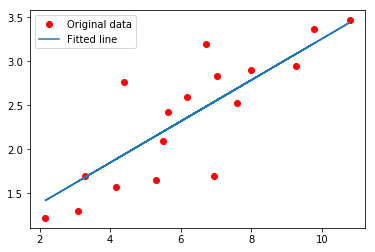

In [73]:
# Launch the Graph

with tf.Session() as sess:
    sess.run(init)
    
    # Fit all training data
    
    # Run Optimization
    for epoch in range(training_Epochs):
        for (x,y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict = {
                X: x,
                Y: y
            })
        #Display logs per epoch step
        if (epoch+1) % display_Step == 0:
            c = sess.run(cost, feed_dict={
                X: train_X,
                Y: train_Y
            })
            print ('\n Epoch: ', (epoch+1), 'Cost= ', c, 'W= ', sess.run(W), 'b= ', sess.run(b))
            
    print ('\n Optimzation Finished!')
    
    # Get Training Cost
    training_Cost = sess.run(cost, feed_dict={
        X: train_X,
        Y: train_Y
    })
    print ('\n Training Cost= ', training_Cost, 'W= ', sess.run(W), 'b= ', sess.run(b))
    
        #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [76]:
# launch the graph

with tf.Session() as sess:
    #initizlie all teh variables
    sess.run(init)
    
    #fit all training data, so run through all training epochs 
    for epoch in range(training_Epoch):
        
        # we need to run optimizer in session through train X and train Y
        for (x,y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        # now let's print cost, with W and b for each display step under already running epoch step
        # we will go through epoch 1 to last epoch and calcualte cost and print only when modulo is 0
        # modulo will be 0 for each 0 ending display step, 50, 100, 150,....1000
        if (epoch+1) % display_Step == 0:
            c = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
            print ('Epoch= ', epoch+1, 'Cost= ', c, 'W= ', sess.run(W), 'b= ', sess.run(b))
            
    # print optimization finished when epochs ends
    print ('\n Optimization Finished!')
    
    # Calculate and print final training cost
    training_Cost = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
    print ('\n Training Cost= ', training_Cost, 'W= ', sess.run(W), 'b= ', sess.run(b))
    

Epoch=  50 Cost=  0.0847614 W=  0.200597 b=  1.15395
Epoch=  100 Cost=  0.0838688 W=  0.203511 b=  1.13298
Epoch=  150 Cost=  0.0830788 W=  0.206251 b=  1.11327
Epoch=  200 Cost=  0.0823799 W=  0.208829 b=  1.09473
Epoch=  250 Cost=  0.0817614 W=  0.211253 b=  1.07729
Epoch=  300 Cost=  0.0812141 W=  0.213533 b=  1.06088
Epoch=  350 Cost=  0.0807297 W=  0.215678 b=  1.04545
Epoch=  400 Cost=  0.080301 W=  0.217695 b=  1.03094
Epoch=  450 Cost=  0.0799216 W=  0.219592 b=  1.0173
Epoch=  500 Cost=  0.0795858 W=  0.221376 b=  1.00446
Epoch=  550 Cost=  0.0792887 W=  0.223055 b=  0.992385
Epoch=  600 Cost=  0.0790257 W=  0.224633 b=  0.981029
Epoch=  650 Cost=  0.0787929 W=  0.226118 b=  0.970349
Epoch=  700 Cost=  0.0785868 W=  0.227514 b=  0.960303
Epoch=  750 Cost=  0.0784045 W=  0.228827 b=  0.950858
Epoch=  800 Cost=  0.0782431 W=  0.230062 b=  0.941974
Epoch=  850 Cost=  0.0781002 W=  0.231224 b=  0.933619
Epoch=  900 Cost=  0.0779737 W=  0.232316 b=  0.92576
Epoch=  950 Cost=  0.077